In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import special
%matplotlib inline

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
from mixed_quantum import qd_base_data as qd

# Class for plotting

In [10]:
# %load plot_data.py
"""
Class to plot data
"""
import numpy as np
import matplotlib.pyplot as plt


class plot_data:
    """Class to store data to later plot"""
    def __init__(self):
        """Initialize the variable with the data"""
        self.data = dict()

    def add_data(self, x_data, y_data, **data_info):
        """Add the data to the data dictionary
        data_info (tuple): title, x_label, y_label"""
        if not isinstance(x_data, np.ndarray
                          ) or not isinstance(y_data, np.ndarray):
            raise Exception("Data is not numpy array!!")

        self.data[data_info['label']] = [x_data, y_data, data_info]
        return print("Data Added Successfully")

    def single_plot(self, label, save=False, labelsize=14, size=(10, 8)):
        """Make a single plot for specific data"""
        x_val = self.data[label][0]
        y_val = self.data[label][1]
        if len(y_val.shape) > 1:
            for y_i in y_val:
                plt.plot(x_val, y_i)
        else:
            plt.plot(x_val, y_val)
            
        # plt.title(data_info, fontsize=labelsize)
        plt.xlabel(self.data[label][2]["xlabel"], fontsize=labelsize)
        plt.ylabel(self.data[label][2]["ylabel"], fontsize=labelsize)
        plt.tick_params(labelsize=labelsize-2)
        if save:
            plt.savefig(f"Figure_{label}.png", dpi=300,
                        transparent=True, bbox_inches='tight')
        plt.show()


# Check parameter influence

a: [0.5:8] nm - static 4 nm [guarantee all energy levels]

m*: [0.05:0.3] me - static 0.08 [ref]

V0: [1:2] V0 - static 1.15 [normal perovskite] 1.9 [high eg perovskite]

In [11]:
data_to_plot = plot_data()

In [12]:
a = np.linspace(0.5, 8, 1000)

In [13]:
a_variation_19 = np.array([
    [qd.qd_results(a_i, 1.9, 0.08, 0.08, mode=('simple',0)).e_levels[0] if qd.qd_results(a_i, 1.9, 0.08, 0.08, mode = ('simple',0)).e_levels else np.nan for a_i in a],
    [qd.qd_results(a_i, 1.9, 0.08, 0.08, mode=('simple',1)).e_levels[0] if qd.qd_results(a_i, 1.9, 0.08, 0.08, mode = ('simple',1)).e_levels else np.nan for a_i in a],
    [qd.qd_results(a_i, 1.9, 0.08, 0.08, mode=('simple',2)).e_levels[0] if qd.qd_results(a_i, 1.9, 0.08, 0.08, mode = ('simple',2)).e_levels else np.nan for a_i in a],
    [qd.qd_results(a_i, 1.9, 0.08, 0.08, mode=('simple',0)).e_levels[1] if len(qd.qd_results(a_i, 1.9, 0.08, 0.08, mode = ('simple',0)).e_levels)>=2 else np.nan for a_i in a]
])

In [14]:
a_variation_115 = np.array([
    [qd.qd_results(a_i, 1.15, 0.08, 0.08, mode=('simple',0)).e_levels[0] if qd.qd_results(a_i, 1.15, 0.08, 0.08, mode = ('simple',0)).e_levels else np.nan for a_i in a],
    [qd.qd_results(a_i, 1.15, 0.08, 0.08, mode=('simple',1)).e_levels[0] if qd.qd_results(a_i, 1.15, 0.08, 0.08, mode = ('simple',1)).e_levels else np.nan for a_i in a],
    [qd.qd_results(a_i, 1.15, 0.08, 0.08, mode=('simple',2)).e_levels[0] if qd.qd_results(a_i, 1.15, 0.08, 0.08, mode = ('simple',2)).e_levels else np.nan for a_i in a],
    [qd.qd_results(a_i, 1.15, 0.08, 0.08, mode=('simple',0)).e_levels[1] if len(qd.qd_results(a_i, 1.15, 0.08, 0.08, mode = ('simple',0)).e_levels)>=2 else np.nan for a_i in a]
])

In [15]:
V0 = np.linspace(1, 2, 1000)
m = np.linspace(0.05, 0.3, 1000)

In [16]:
V0_variation = np.array([
    [qd.qd_results(4, V0_i, 0.08, 0.08, mode=('simple',0)).e_levels[0] for V0_i in V0],
    [qd.qd_results(4, V0_i, 0.08, 0.08, mode=('simple',1)).e_levels[0] for V0_i in V0],
    [qd.qd_results(4, V0_i, 0.08, 0.08, mode=('simple',2)).e_levels[0] for V0_i in V0],
    [qd.qd_results(4, V0_i, 0.08, 0.08, mode=('simple',0)).e_levels[1] for V0_i in V0]
])

m_variation_19 = np.array([
    [qd.qd_results(4, 1.9, m1_i, m1_i, mode=('simple',0)).e_levels[0] for m1_i in m],
    [qd.qd_results(4, 1.9, m1_i, m1_i, mode=('simple',1)).e_levels[0] for m1_i in m],
    [qd.qd_results(4, 1.9, m1_i, m1_i, mode=('simple',2)).e_levels[0] for m1_i in m],
    [qd.qd_results(4, 1.9, m1_i, m1_i, mode=('simple',0)).e_levels[1] for m1_i in m]
])

m_variation_115 = np.array([
    [qd.qd_results(4, 1.15, m1_i, m1_i, mode=('simple',0)).e_levels[0] for m1_i in m],
    [qd.qd_results(4, 1.15, m1_i, m1_i, mode=('simple',1)).e_levels[0] for m1_i in m],
    [qd.qd_results(4, 1.15, m1_i, m1_i, mode=('simple',2)).e_levels[0] for m1_i in m],
    [qd.qd_results(4, 1.15, m1_i, m1_i, mode=('simple',0)).e_levels[1] for m1_i in m]
])

In [16]:
#m2_variation = np.array([
#    [qd.qd_results(5, 1.15, 0.17, m2_i, mode=('simple',0)).e_levels[0] for m2_i in m],
#    [qd.qd_results(5, 1.15, 0.17, m2_i, mode=('simple',1)).e_levels[0] for m2_i in m],
#    [qd.qd_results(5, 1.15, 0.17, m2_i, mode=('simple',2)).e_levels[0] for m2_i in m],
#    [qd.qd_results(5, 1.15, 0.17, m2_i, mode=('simple',0)).e_levels[1] for m2_i in m]
#])

In [17]:
a_dict_19 = {"a_data": a, "E0": a_variation_19[0], "E1": a_variation_19[1], "E2": a_variation_19[2], "E3": a_variation_19[3]}
a_dict_115 = {"a_data": a, "E0": a_variation_115[0], "E1": a_variation_115[1], "E2": a_variation_115[2], "E3": a_variation_115[3]}
V0_dict = {"V0_data": V0, "E0": V0_variation[0], "E1": V0_variation[1], "E2": V0_variation[2], "E3": V0_variation[3]}
m_dict_19 = {"m_data": m, "E0": m_variation_19[0], "E1": m_variation_19[1], "E2": m_variation_19[2], "E3": m_variation_19[3]}
m_dict_115 = {"m_data": m, "E0": m_variation_115[0], "E1": m_variation_115[1], "E2": m_variation_115[2], "E3": m_variation_115[3]}

In [18]:
a_lin_sweep_19 = pd.DataFrame(a_dict_19)
a_lin_sweep_115 = pd.DataFrame(a_dict_115)
V0_lin_sweep = pd.DataFrame(V0_dict)
m_lin_sweep_19 = pd.DataFrame(m_dict_19)
m_lin_sweep_115 = pd.DataFrame(m_dict_115)

In [19]:
#m2_dict = {"m2_data": m, "E0": m2_variation[0], "E1": m2_variation[1], "E2": m2_variation[2], "E3": m2_variation[3]}

In [20]:
#m2_lin_sweep = pd.DataFrame(m2_dict)

In [20]:
a_lin_sweep_19.to_csv("a_lin_sweep_19.csv", index = False, sep=" ")
a_lin_sweep_115.to_csv("a_lin_sweep_115.csv", index = False, sep=" ")
V0_lin_sweep.to_csv("V0_lin_sweep.csv", index = False, sep=" ")
m_lin_sweep_19.to_csv("m_lin_sweep_19.csv", index = False, sep=" ")
m_lin_sweep_115.to_csv("m_lin_sweep_115.csv", index = False, sep=" ")
#m2_lin_sweep.to_csv("m2_lin_sweep.csv")

# Data visualization with fast plots

In [21]:
data_to_plot.add_data(a, a_variation_19, **{'label': 'a_data', 'xlabel': 'a (nm)', 'ylabel': 'E (eV)'})
data_to_plot.add_data(a, a_variation_115, **{'label': 'a_data_115', 'xlabel': 'a (nm)', 'ylabel': 'E (eV)'})
data_to_plot.add_data(V0, V0_variation, **{'label': 'V0_data', 'xlabel': 'V$_0$ (eV)', 'ylabel': 'E (eV)'})
data_to_plot.add_data(m, m_variation_19, **{'label': 'm1_data_19', 'xlabel': 'm$_1$ (*me)', 'ylabel': 'E (eV)'})
data_to_plot.add_data(m, m_variation_115, **{'label': 'm1_data_115', 'xlabel': 'm$_1$ (*me)', 'ylabel': 'E (eV)'})
#data_to_plot.add_data(m, m2_variation, **{'label': 'm2_data', 'xlabel': 'm$_2$ (*me)', 'ylabel': 'E (eV)'})

Data Added Successfully
Data Added Successfully
Data Added Successfully
Data Added Successfully
Data Added Successfully


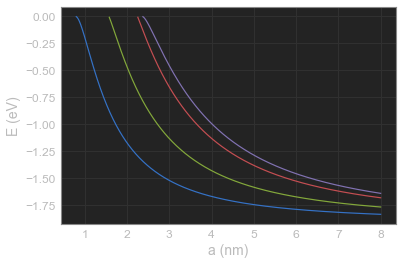

In [22]:
data_to_plot.single_plot('a_data')

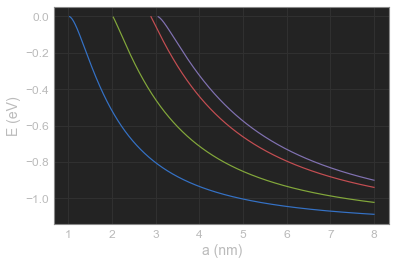

In [23]:
data_to_plot.single_plot('a_data_115')

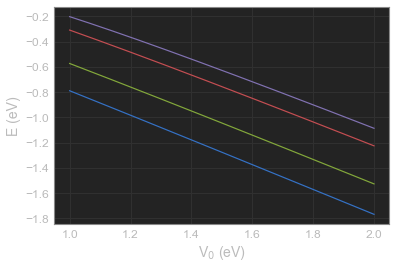

In [24]:
data_to_plot.single_plot('V0_data')

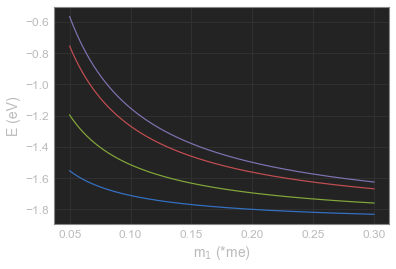

In [25]:
data_to_plot.single_plot('m1_data_19')

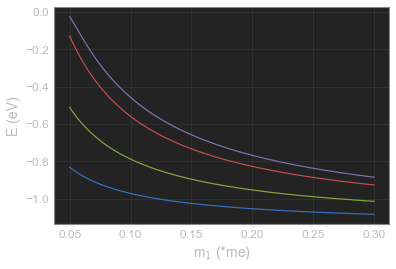

In [26]:
data_to_plot.single_plot('m1_data_115')

In [ ]:
#data_to_plot.single_plot('m2_data')

# Plot the Wavefunctions for 3.9 nm QD Size (E0 to E3)

In [22]:
qd_wavefunction = qd.qd_results(2.4, 1.9, 0.08, 0.08)

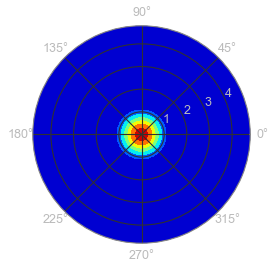

In [26]:
#angular momentum value
l = 0
#index of the energy level
k = 1
#z angular momentum
m = 0

#Calculate the radial part of the wavefunction
r,f_r = qd_wavefunction.norm_wavefunction(l,k)
phi = np.linspace(0,2*np.pi,100)
#Angular part of the wavefunction
y_lm = np.absolute(special.sph_harm(m,l,0,phi))**2
#Combine both radial and angular parts
psi = np.array([y_lm*f_r_i for f_r_i in f_r])

#Grid for exportation purposes
Phi, R = np.meshgrid(phi,r)

Phi = Phi.flatten()[R.flatten() < 3.5]
Psi = psi.flatten()[R.flatten() < 3.5]
R = R.flatten()[R.flatten() < 3.5]

#actual plotting
ax = plt.subplot(111, polar=True)
ctf = ax.contourf(phi,r,psi, cmap=cm.jet)
data_to_export = {"Phi": Phi.flatten(), "R": R.flatten(), "Wavefunction": Psi.flatten()}
pd.DataFrame(data_to_export).to_csv(f"wavefunction_l{l}_n{k}.csv", index = False, sep=" ")

# Check interparameter relations

In [27]:
a = np.linspace(1.4, 8, 100)
V0 = np.linspace(1, 2, 100)
m = np.linspace(0.05, 0.3, 100)

In [35]:
print("Calculating a - V0 relation....")
data = list()
a_v0_mesh, v0_a_mesh = np.meshgrid(a, V0)
for a_i, v_i in zip(a_v0_mesh, v0_a_mesh):
    data.append(list(map(
            lambda a_i, v_i: qd.qd_results(
                a_i, v_i, 0.08, 0.08, mode=('simple', 0)).e_levels[0],
            a_i, v_i
        )))
data_a_V0 = np.array(data)
print("DONE!....")


print("Calculating a - m realations for V0 1.9 eV...")
data = list()
a_m_mesh, m_a_mesh = np.meshgrid(a, m)
for a_i, m1_i in zip(a_m_mesh, m_a_mesh):
    data.append(list(map(
            lambda a_i, m_i: qd.qd_results(
                a_i, 1.9, m_i, m_i, mode=('simple', 0)).e_levels[0],
            a_i, m1_i
            )))
data_a_m1_19 = np.array(data)
print("DONE!....")

print("Calculating a - m realations for V0 1.15 eV...")
data = list()
a_m_mesh, m_a_mesh = np.meshgrid(a, m)
for a_i, m1_i in zip(a_m_mesh, m_a_mesh):
    data.append(list(map(
            lambda a_i, m_i: qd.qd_results(
                a_i, 1.15, m_i, m_i, mode=('simple', 0)).e_levels[0],
            a_i, m1_i
            )))
data_a_m1_115 = np.array(data)
print("DONE!....")

print("Calculating V0 - m relation...")
data = list()
v0_m_mesh, m_v0_mesh = np.meshgrid(V0, m)
for V0_i, m1_i in zip(v0_m_mesh, m_v0_mesh):
    data.append(list(map(
            lambda V0_i, m_i: qd.qd_results(
                3.5, V0_i, m_i, m_i, mode=('simple', 0)).e_levels[0],
            V0_i, m1_i
            )))
data_V0_m1 = np.array(data)
print("DONE!....")

Calculating a - V0 relation....
DONE!....
Calculating a - m realations for V0 1.9 eV...
DONE!....
Calculating a - m realations for V0 1.15 eV...
DONE!....
Calculating V0 - m relation...
DONE!....


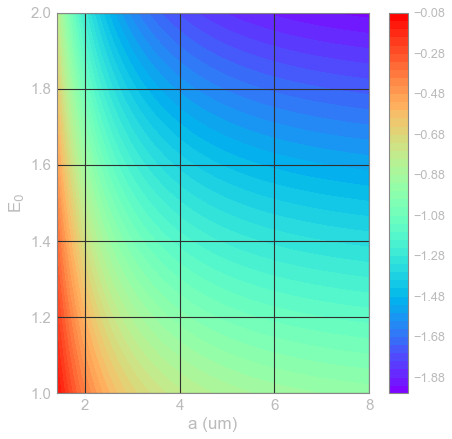

In [36]:
plt.figure(figsize=(7, 7))
plt.contourf(a_v0_mesh, v0_a_mesh, data_a_V0, levels = 50, cmap = plt.cm.rainbow)
plt.xlabel('a (um)', fontsize=17); plt.ylabel('V0 (eV)', fontsize=17);
plt.tick_params(labelsize=15)
plt.colorbar()
plt.ylabel("E$_0$")
plt.savefig("Test.png", dpi=300,
                transparent=True, bbox_inches='tight')

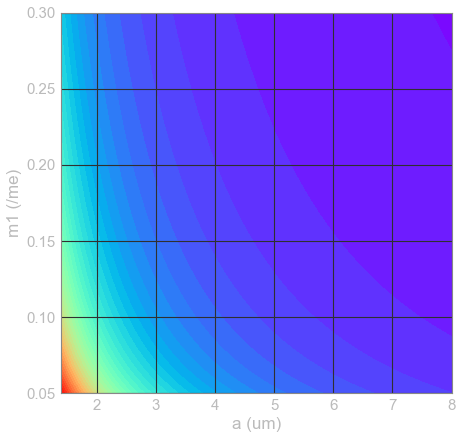

In [37]:
plt.figure(figsize=(7, 7))
plt.contourf(a_m_mesh, m_a_mesh, data_a_m1_19, levels = 50, cmap = plt.cm.rainbow)
plt.xlabel('a (um)', fontsize=17); plt.ylabel('m1 (/me)', fontsize=17);
plt.tick_params(labelsize=15)

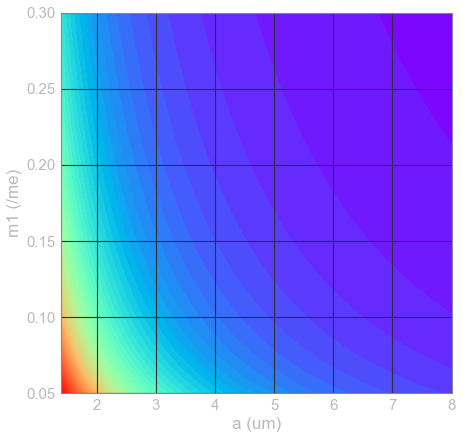

In [38]:
plt.figure(figsize=(7, 7))
plt.contourf(a_m_mesh, m_a_mesh, data_a_m1_115, levels = 50, cmap = plt.cm.rainbow)
plt.xlabel('a (um)', fontsize=17); plt.ylabel('m1 (/me)', fontsize=17);
plt.tick_params(labelsize=15)

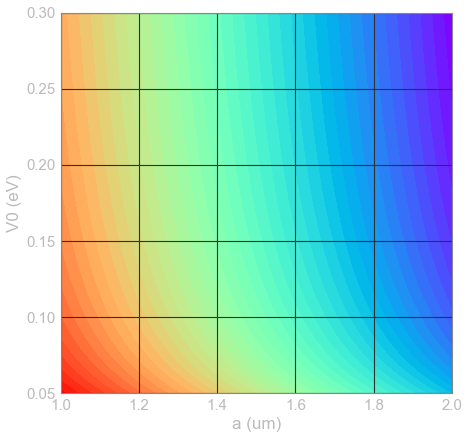

In [39]:
plt.figure(figsize=(7, 7))
plt.contourf(v0_m_mesh, m_v0_mesh, data_V0_m1, levels = 50, cmap = plt.cm.rainbow)
plt.xlabel('a (um)', fontsize=17); plt.ylabel('V0 (eV)', fontsize=17);
plt.tick_params(labelsize=15)

In [42]:
a_v0_dict = {"a": a_v0_mesh.flatten(), "V0": v0_a_mesh.flatten(), "data": data_a_V0.flatten()}
a_m_dict_19 = {"a": a_m_mesh.flatten(), "m": m_a_mesh.flatten(), "data": data_a_m1_19.flatten()}
a_m_dict_115 = {"a": a_m_mesh.flatten(), "m": m_a_mesh.flatten(), "data": data_a_m1_115.flatten()}
v0_m_dict = {"V0": v0_m_mesh.flatten(), "m": m_v0_mesh.flatten(), "data": data_V0_m1.flatten()}

In [43]:
a_v0_df = pd.DataFrame(a_v0_dict)
a_m_df_19 = pd.DataFrame(a_m_dict_19)
a_m_df_115 = pd.DataFrame(a_m_dict_115)
v0_m_df = pd.DataFrame(v0_m_dict)

In [45]:
a_v0_df.to_csv("a_V0_sweep.csv", index=False, sep=" ")
a_m_df_19.to_csv("a_m_sweep_19.csv", index=False, sep=" ")
a_m_df_115.to_csv("a_m_sweep_115.csv", index=False, sep=" ")
v0_m_df.to_csv("V0_m_sweep.csv", index=False, sep=" ")

# The absorption profile

## Calculations for 1.6 nm (V0 = 1.9 eV)

In [20]:
a, V0, m1, m2 = 1.6, 1.9, 0.08, 0.08

In [21]:
data_16 = qd.qd_results(a, V0, m1, m2)

In [22]:
data_16.e_levels

,l0,l1
0,-0.893254,-0.026307


Calculate all radial matrix elements

In [23]:
print(f"""
{data_16.rad_matrix_element((0,0),(0,0))}
{data_16.rad_matrix_element((0,0),(1,0))}
""")
#{data_25.rad_matrix_element((0,0),(2,0))}
#{data_25.rad_matrix_element((0,0),(0,1))}
#{data_25.rad_matrix_element((1,0),(2,0))}
#{data_25.rad_matrix_element((1,0),(0,1))}
#{data_25.rad_matrix_element((2,0),(0,1))}
#""")


1.1650855187450158
0.650463238205635



In [24]:
print(f"""
Ep_z, Ep_left, Ep_right--
li = 0, lf = 0
{data_16.all_ang_matrix_elements(0,0)}\n
li = 0, lf = 1
{data_16.all_ang_matrix_elements(0,1)}\n
li = 0, lf = 2
{data_16.all_ang_matrix_elements(0,2)}\n
li = 1, lf = 0
{data_16.all_ang_matrix_elements(1,0)}\n
li = 1, lf = 2
{data_16.all_ang_matrix_elements(1,2)}\n
li = 2, lf = 0
{data_16.all_ang_matrix_elements(2,0)}\n
li = 2, lf = 1
{data_16.all_ang_matrix_elements(2,1)}\n
""")


Ep_z, Ep_left, Ep_right--
li = 0, lf = 0
(array([[[0., 0., 0.]]]), array([0., 0., 0.]))

li = 0, lf = 1
(array([[[0.        , 0.40824829, 0.        ]],

       [[0.57735027, 0.        , 0.        ]],

       [[0.        , 0.        , 0.40824829]]]), array([0.57735027, 0.40824829, 0.40824829]))

li = 0, lf = 2
(array([[[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]]]), array([0., 0., 0.]))

li = 1, lf = 0
(array([[[ 0.        ,  0.        , -0.40824829],
        [ 0.57735027,  0.        ,  0.        ],
        [ 0.        , -0.40824829,  0.        ]]]), array([ 0.57735027, -0.40824829, -0.40824829]))

li = 1, lf = 2
(array([[[0.        , 0.4472136 , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.4472136 , 0.        , 0.        ],
        [0.        , 0.31622777, 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 

### The absorption profile

In [25]:
energy = np.linspace(0,1.5,500)
energies = data_16.e_levels.values
density = (np.pi/6, np.pi/6, np.pi/6)

Calculos para a primeira transição

Os cálculos são feitos para dispersões de 0.025 e 0.05 eV

In [28]:
e_0_1 = abs(energies[0,0] - energies[0,1])
rad_elements = data_16.rad_matrix_element((0,0),(1,0))
_, ang_elements = data_16.all_ang_matrix_elements(0,1)
absorption_1 = qd.absorption_ij(energy, e_0_1, rad_elements*ang_elements[:,np.newaxis], qd_density=density)
absorption_2 = qd.absorption_ij(energy, e_0_1, rad_elements*ang_elements[:,np.newaxis], gauss_dispersion = 0.05, qd_density=density)

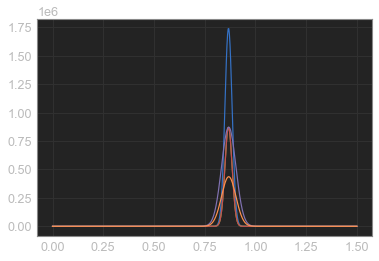

In [30]:
plt.plot(energy, absorption_1[0], energy, absorption_1[1], energy, absorption_1[2], energy, absorption_2[0], energy, absorption_2[1])

Total absorption

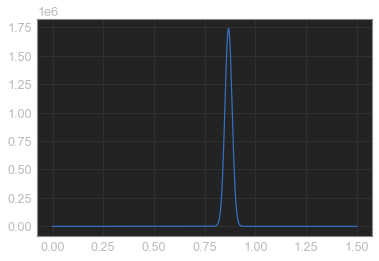

In [50]:
plt.plot(energy, absorption_1[0])

In [31]:
data_16_dict_z = {"Energy": energy, "abs1": absorption_1[0], "abs2": absorption_2[0]}
data_16_dict_left = {"Energy": energy, "abs1": absorption_1[1], "abs2": absorption_2[1]}
pd.DataFrame(data_16_dict_z).to_csv("Absorption_z_16nm_19.csv", index=False, sep=" ")
pd.DataFrame(data_16_dict_left).to_csv("Absorption_left_16nm_19.csv", index=False, sep=" ")

## Calculation for 2.4 nm (V0 = 1.9)

In [65]:
a, V0, m1, m2 = 2.5, 1.9, 0.08, 0.08
density = (np.pi/6, np.pi/6, np.pi/6)

In [66]:
data_24 = qd.qd_results(a, V0, m1, m2)

In [67]:
data_24.e_levels

,l0,l1,l2
0,-1.386841,-0.869379,-0.251787
1,-0.068220,NaN,NaN


Angular Elements (l = 0 → any)

In [68]:
print

<function print>

In [69]:
print(f"""
li = 0, lf = 0
{data_24.all_ang_matrix_elements(0,0)}\n
li = 0, lf = 1
{data_24.all_ang_matrix_elements(0,1)}\n
li = 0, lf = 2
{data_24.all_ang_matrix_elements(0,2)}\n
li = 0, lf = 3
{data_24.all_ang_matrix_elements(0,3)}\n
li = 0, lf = 4
{data_24.all_ang_matrix_elements(0,4)}\n
li = 0, lf = 5
{data_24.all_ang_matrix_elements(0,5)}\n
li = 1, lf = 0
{data_24.all_ang_matrix_elements(1,0)}\n
li = 1, lf = 1
{data_24.all_ang_matrix_elements(1,1)}\n
li = 1, lf = 2
{data_24.all_ang_matrix_elements(1,2)}\n
li = 1, lf = 3
{data_24.all_ang_matrix_elements(1,3)}\n
li = 1, lf = 4
{data_24.all_ang_matrix_elements(1,4)}\n
li = 1, lf = 5
{data_24.all_ang_matrix_elements(1,5)}\n
li = 2, lf = 0
{data_24.all_ang_matrix_elements(2,0)}\n
li = 2, lf = 1
{data_24.all_ang_matrix_elements(2,1)}\n
li = 2, lf = 2
{data_24.all_ang_matrix_elements(2,2)}\n
li = 2, lf = 3
{data_24.all_ang_matrix_elements(2,3)}\n
li = 2, lf = 4
{data_24.all_ang_matrix_elements(2,4)}\n
li = 2, lf = 5
{data_24.all_ang_matrix_elements(2,5)}\n
li = 3, lf = 0
{data_24.all_ang_matrix_elements(3,0)}\n
li = 3, lf = 1
{data_24.all_ang_matrix_elements(3,1)}\n
li = 3, lf = 2
{data_24.all_ang_matrix_elements(3,2)}\n
li = 3, lf = 3
{data_24.all_ang_matrix_elements(3,3)}\n
li = 3, lf = 4
{data_24.all_ang_matrix_elements(3,4)}\n
li = 3, lf = 5
{data_24.all_ang_matrix_elements(3,5)}\n
li = 4, lf = 0
{data_24.all_ang_matrix_elements(4,0)}\n
li = 4, lf = 1
{data_24.all_ang_matrix_elements(4,1)}\n
li = 4, lf = 2
{data_24.all_ang_matrix_elements(4,2)}\n
li = 4, lf = 3
{data_24.all_ang_matrix_elements(4,3)}\n
li = 4, lf = 4
{data_24.all_ang_matrix_elements(4,4)}\n
li = 4, lf = 5
{data_24.all_ang_matrix_elements(4,5)}\n
li = 5, lf = 0
{data_24.all_ang_matrix_elements(5,0)}\n
li = 5, lf = 1
{data_24.all_ang_matrix_elements(5,1)}\n
li = 5, lf = 2
{data_24.all_ang_matrix_elements(5,2)}\n
li = 5, lf = 3
{data_24.all_ang_matrix_elements(5,3)}\n
li = 5, lf = 4
{data_24.all_ang_matrix_elements(5,4)}\n
li = 5, lf = 5
{data_24.all_ang_matrix_elements(5,5)}\n
""")


li = 0, lf = 0
(array([[[0., 0., 0.]]]), array([0., 0., 0.]))

li = 0, lf = 1
(array([[[0.        , 0.40824829, 0.        ]],

       [[0.57735027, 0.        , 0.        ]],

       [[0.        , 0.        , 0.40824829]]]), array([0.57735027, 0.40824829, 0.40824829]))

li = 0, lf = 2
(array([[[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]]]), array([0., 0., 0.]))

li = 0, lf = 3
(array([[[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]]]), array([0., 0., 0.]))

li = 0, lf = 4
(array([[[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]]]), array([0., 0., 0.]))

li = 0, lf = 5
(array([[[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]

Radial elements

In [70]:
e_level_index = [(0, 0), (1, 0), (2, 0),
                 (0, 1)]

In [71]:
for i in e_level_index:
    [
        print(f"Transition from {i} to {j} = {data_24.rad_matrix_element(i, j)}") for j in e_level_index
    ]

Transition from (0, 0) to (0, 0) = 1.5430008071201788
Transition from (0, 0) to (1, 0) = 1.4267580082463718
Transition from (0, 0) to (2, 0) = 1.00022809810135
Transition from (0, 0) to (0, 1) = 0.19896096894585838
Transition from (1, 0) to (0, 0) = 1.4267580082463718
Transition from (1, 0) to (1, 0) = 1.8748049705539311
Transition from (1, 0) to (2, 0) = 1.4659841430328655
Transition from (1, 0) to (0, 1) = -0.3978645378094076
Transition from (2, 0) to (0, 0) = 1.00022809810135
Transition from (2, 0) to (1, 0) = 1.4659841430328655
Transition from (2, 0) to (2, 0) = 2.176960597211224
Transition from (2, 0) to (0, 1) = -1.5607486736064362
Transition from (0, 1) to (0, 0) = 0.1989609689458584
Transition from (0, 1) to (1, 0) = -0.3978645378094076
Transition from (0, 1) to (2, 0) = -1.5607486736064364
Transition from (0, 1) to (0, 1) = 2.5710683625588286


In [72]:
energy = np.linspace(0, 1, 500)
energy_data = data_24.e_levels.values

In [73]:
print(energy_data)

[[-1.38684114 -0.86937871 -0.25178691]
 [-0.06822032         nan         nan]]


In [74]:
e_0_1 = abs(energy_data[0,0] - energy_data[0,1])
rad_elements = data_24.rad_matrix_element((0,0),(1,0))
_, ang_elements = data_24.all_ang_matrix_elements(0,1)

In [75]:
absorption_1 = qd.absorption_ij(energy, e_0_1, rad_elements*ang_elements[:,np.newaxis], qd_density=density)

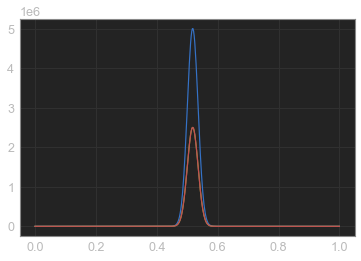

In [76]:
plt.plot(energy, absorption_1[0], energy, absorption_1[1], energy, absorption_1[2])

In [77]:
e_0_2 = abs(energy_data[0,1] - energy_data[0,2])
rad_elements = data_24.rad_matrix_element((1,0),(2,0))
_, ang_elements = data_24.all_ang_matrix_elements(1,2)
absorption_2 = qd.absorption_ij(energy, e_0_2, rad_elements*ang_elements[:,np.newaxis], qd_density=density)

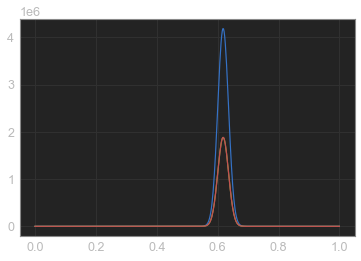

In [78]:
plt.plot(energy, absorption_2[0], energy, absorption_2[1], energy, absorption_2[2])

In [79]:
e_0_3 = abs(energy_data[0, 1] - energy_data[1, 0])
rad_elements = data_24.rad_matrix_element((1, 0), (0, 1))
_, ang_elements = data_24.all_ang_matrix_elements(0, 1)
absorption_3 = qd.absorption_ij(energy, e_0_3, rad_elements*ang_elements[:,np.newaxis], qd_density=density)

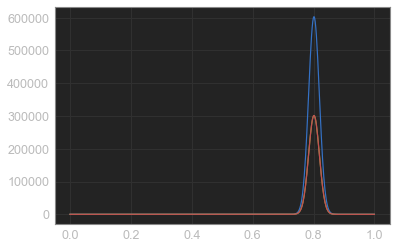

In [80]:
plt.plot(energy, absorption_3[0], energy, absorption_3[1], energy, absorption_3[2])

In [81]:
e_0_4 = abs(energy_data[0, 1] - energy_data[1, 0])
rad_elements = data_24.rad_matrix_element((1, 0), (0, 1))
_, ang_elements = data_24.all_ang_matrix_elements(1, 0)
absorption_4 = qd.absorption_ij(energy, e_0_4, rad_elements*ang_elements[:,np.newaxis], qd_density=density)

In [82]:
total_abs_z = absorption_1[0] + absorption_2[0] + absorption_3[0]
total_abs_left = absorption_1[1] + absorption_2[1] + absorption_3[1]

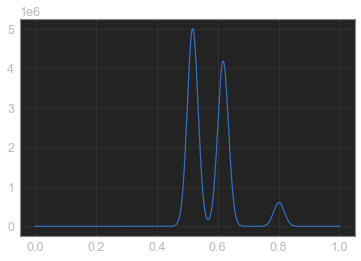

In [83]:
plt.plot(energy, total_abs_z)

In [84]:
z_data_24 = { 
    "Energy": energy,
    "absorption1": absorption_1[0],
    "absorption2": absorption_2[0],
    "absorption3": absorption_3[0],
    "total_absorption": total_abs_z
    }
left_data_24 = { 
    "Energy": energy,
    "absorption1": absorption_1[1],
    "absorption2": absorption_2[1],
    "absorption3": absorption_3[1],
    "total_absorption": total_abs_left
    }

In [85]:
pd.DataFrame(z_data_24).to_csv("Absorption_z_24_19.csv", index=False, sep=" ")
pd.DataFrame(left_data_24).to_csv("Absorption_left_24_19.csv", index=False, sep=" ")

# Calculate levels for 1.55 eV

## 1.6 nm and 1,15 eV

In [52]:
a, V0, m1, m2 = 1.6, 1.15, 0.08, 0.08
density = (np.pi/6, np.pi/6, np.pi/6)

In [53]:
data_16_155 = qd.qd_results(a, V0, m1, m2)

In [54]:
data_16_155.e_levels

,l0
0,-0.31367


## 2.4 nm

In [56]:
a, V0, m1, m2 = 2.5, 1.15, 0.08, 0.08
density = (np.pi/6, np.pi/6, np.pi/6)

In [57]:
data_24_115 = qd.qd_results(a, V0, m1, m2)

In [58]:
data_24_115.e_levels

,l0,l1
0,-0.690038,-0.248331


In [59]:
print(f"""
{data_24_115.rad_matrix_element((0,0),(0,0))}
{data_24_115.rad_matrix_element((0,0),(1,0))}
""")


1.665380054331275
1.3200387948821706



In [60]:
print(f"""
Ep_z, Ep_left, Ep_right--
li = 0, lf = 0
{data_24_115.all_ang_matrix_elements(0,0)}\n
li = 0, lf = 1
{data_24_115.all_ang_matrix_elements(0,1)}\n
""")


Ep_z, Ep_left, Ep_right--
li = 0, lf = 0
(array([[[0., 0., 0.]]]), array([0., 0., 0.]))

li = 0, lf = 1
(array([[[0.        , 0.40824829, 0.        ]],

       [[0.57735027, 0.        , 0.        ]],

       [[0.        , 0.        , 0.40824829]]]), array([0.57735027, 0.40824829, 0.40824829]))




In [61]:
energy = np.linspace(0,1.5,500)
energies = data_24_115.e_levels.values
density = (np.pi/6, np.pi/6, np.pi/6)

In [62]:
e_0_1 = abs(energies[0,0] - energies[0,1])
rad_elements = data_24_115.rad_matrix_element((0,0),(1,0))
_, ang_elements = data_24_115.all_ang_matrix_elements(0,1)
absorption_1 = qd.absorption_ij(energy, e_0_1, rad_elements*ang_elements[:,np.newaxis], qd_density=density)

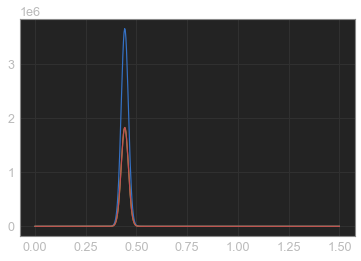

In [63]:
plt.plot(energy, absorption_1[0], energy, absorption_1[1], energy, absorption_1[2])

In [64]:
data_24_115_dict_z = {"Energy": energy, "abs1": absorption_1[0]}
data_24_115_dict_left = {"Energy": energy, "abs1": absorption_1[1]}
pd.DataFrame(data_24_115_dict_z).to_csv("Absorption_z_24_nm_115.csv", index=False, sep=" ")
pd.DataFrame(data_24_115_dict_left).to_csv("Absorption_left_24nm_115.csv", index=False, sep=" ")